# Step 1: Import necessary libraries

Before building a decision tree model, we first need to import the necessary libraries. These libraries provide essential tools for data manipulation, model training, evaluation, and visualization.

*   *pandas* is used for data manipulation and analysis.
*   *sklearn.tree* provides tools for building and evaluating decision trees.
*   *sklearn.model_selection* is used for splitting data into training and testing sets.
*   *sklearn.metrics* is used for evaluating model performance.
matplotlib.pyplot is used for data visualization.
*   *matplotlib.pyplot* is used for data visualization.

In [10]:
# Import necessary libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 2: Load and print the data

The first line loads data from a CSV file named heart.csv, located in the /content/ directory. It assumes the file is in the default working directory of the Colab environment.

The second line prints the first few rows of the CSV file for inspection.

In [11]:
# Load the data

data = pd.read_csv('/content/heart.csv')

# Print the data

print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


**Note**

*Target*:
0 = no disease,
1 = disease

# Step 3: Determine the two best predicting features

This step uses a *DecisionTreeClassifier* to determine the two most important features for predicting the target variable. It fits a basic decision tree to the data (using all features except the target) and extracts feature importances.


It then creates a *DataFrame* to store and sort features by their importance.

Finally, it selects the top two features as the 'best_features'.

In [12]:
# Determine the two best predicting features

# Create a DecisionTreeClassifier and fit it to the data
tree_model = DecisionTreeClassifier()
tree_model.fit(data.drop('target', axis=1), data['target'])  # Fit the model to all features except the target

# Get feature importances
feature_importances = tree_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'feature': data.drop('target', axis=1).columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

# Get the two best features
best_features = feature_importance_df['feature'][:2].tolist()

print("Two best predicting features:", best_features)

     feature  importance
2         cp    0.266271
11        ca    0.139477
12      thal    0.112727
9    oldpeak    0.111397
4       chol    0.110330
3   trestbps    0.057501
0        age    0.057287
7    thalach    0.046654
10     slope    0.036848
1        sex    0.022451
8      exang    0.020427
6    restecg    0.018630
5        fbs    0.000000
Two best predicting features: ['cp', 'ca']


The two best predicting features in our dataset are:


1.   **Chest pain type** ('cp')
*   0: typical angina
*   1: atypical angina
*   2: non-typical anginal pain
*   3: asymptomatic

2.   **Number of major vessels coloured by flouroscopy** ('ca'; i.e., how many of the main blood vessels supplying the heart appear to be narrowed or blocked)
*   0
*   1
*   2
*   3

# Step 4: Preparing the data



This step prepares the data for model training and evaluation.

It selects the 'best_features' identified in the previous step as the input features (X).
It assigns the target variable to 'y'.

It splits the data into training and testing sets using *train_test_split*.
*   test_size=0.2 means 20% of the data is used for testing and 80% of the data is used for training. random_state=42 ensures the split is reproducible.



In [13]:
# Prepare the data

X = data[best_features]  # Use the identified best features
y = data['target']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Step 5: Training the model

This step creates a *DecisionTreeClassifier* and trains it on the training data (X_train, y_train).

In [14]:
# Create and train the decision tree model

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

# Step 6: Prediction

The trained model is used to make predictions on the test data (X_test).

In [15]:
# Make predictions

y_pred = tree_model.predict(X_test)

# Step 7a: Confusion matrix

This step evaluates the model's performance using a confusion matrix.

The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.

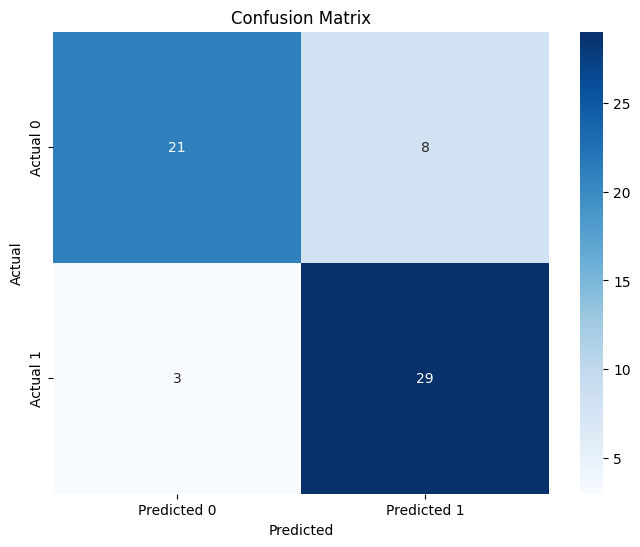

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 7a: Interpretation

Our confusion matrix shows:



*   **True Positives** (TP): 29 (Actual 1, Predicted 1) - The model correctly predicted 29 instances as class 1.
*   **True Negatives** (TN): 21 (Actual 0, Predicted 0) - The model correctly predicted 21 instances as class 0.
*   **False Positives** (FP): 8 (Actual 0, Predicted 1) - The model incorrectly predicted 8 instances as class 1 when they were actually class 0 (Type I error).
*   **False Negatives** (FN): 3 (Actual 1, Predicted 0) - The model incorrectly predicted 3 instances as class 0 when they were actually class 1 (Type II error).

# Step 7b: Performance metrics

This step assesses the model's performance using additional metrics, based on the confusion matrix.

*   **Accuracy**: The overall proportion of correctly classified instances. It is calculated as (TP + TN) / (TP + TN + FP + FN).
*   **Precision**: Out of all the instances predicted as positive, how many were actually positive. It is calculated as TP / (TP + FP).
*   **Recall** (Sensitivity): Out of all the actual positive instances, how many were correctly predicted as positive. It is calculated as TP / (TP + FN).
*   **F1-score**: The harmonic mean of precision and recall. It provides a balanced measure between the two. It is calculated as 2 * (precision * recall) / (precision + recall).

In [17]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.819672131147541
Precision: 0.7837837837837838
Recall: 0.90625
F1-score: 0.8405797101449275


# Step 7b: Interpretation



*   **Accuracy**: ~0.82

This value means our model correctly classified approximately 82% of the instances in the test dataset. It's a good starting point, but we need to consider other metrics as well, especially if we have imbalanced classes.
*   **Precision**: ~0.78

This value indicates that out of all the instances our model predicted as positive (class 1), around 78% were actually positive. It means there's a 22% chance that if our model predicts an instance as positive, it might be wrong (False Positive).
*   **Recall**: ~0.91

This value shows that out of all the actual positive instances (class 1) in the test set, our model correctly identified around 91% of them. It means there's a 9% chance that our model might miss a positive instance (False Negative).
*   **F1-score**: ~0.84

This value is a harmonic mean of precision and recall, providing a balanced measure between the two. A score of 0.84 suggests a good balance between precision and recall, meaning our model is performing well in terms of both minimizing false positives and false negatives.



# Step 8: Visualize the decision tree

Finally, this step visualizes the trained decision tree using *plot_tree*, making it easier to understand the model's decision-making process.

This visualization can be shared with clinicians and other stakeholders.

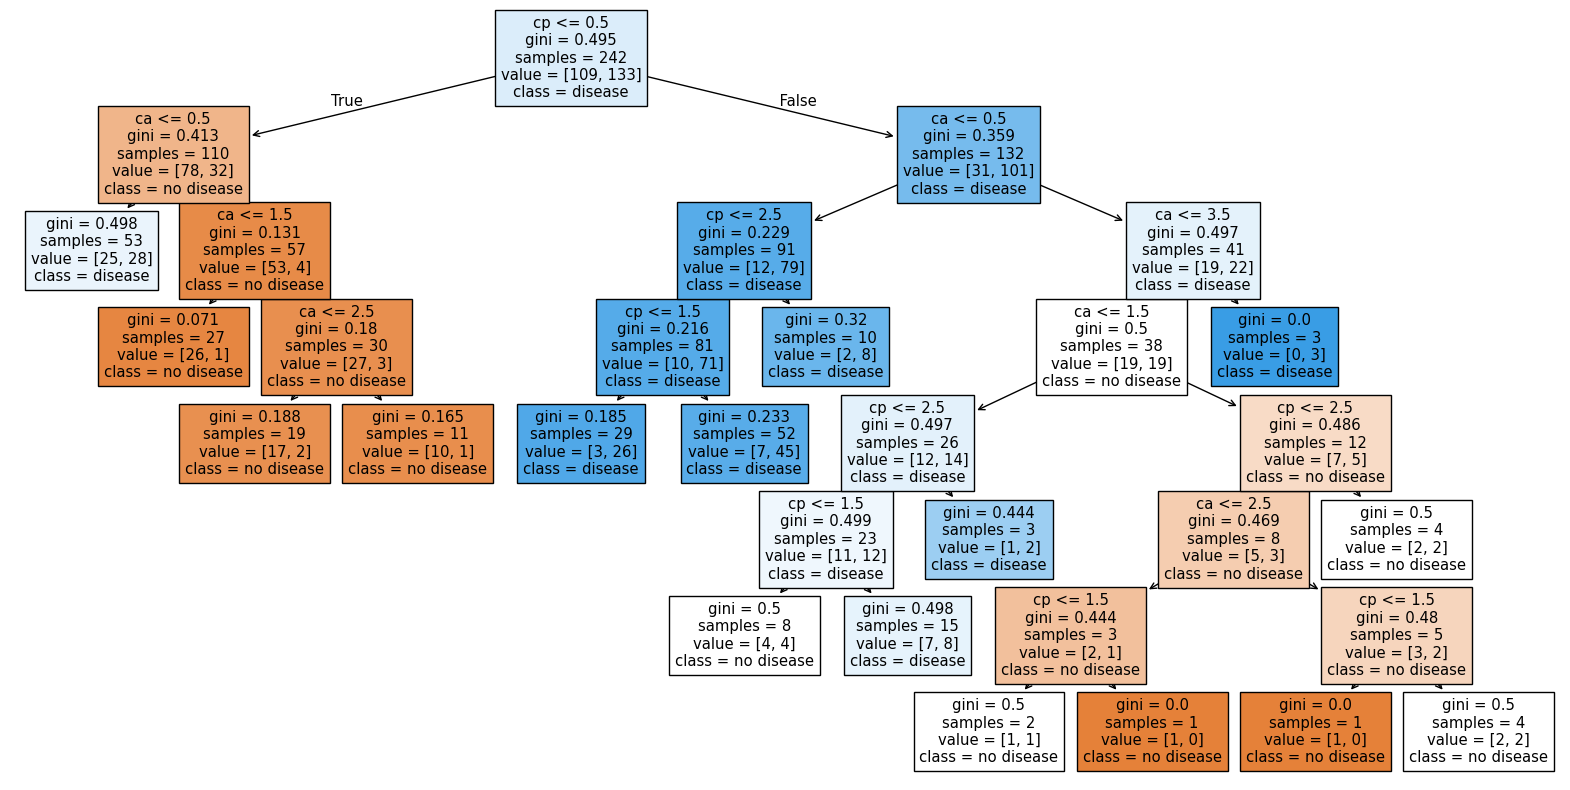

In [18]:
# Visualize the decision tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=['cp', 'ca'], class_names=['no disease', 'disease'], filled=True)
plt.show()